Automatically created module for IPython interactive environment


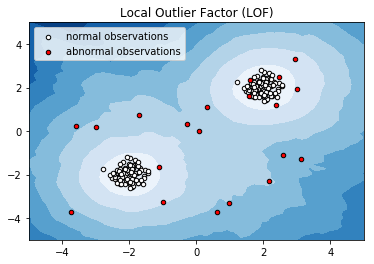

In [2]:
# http://scikit-learn.org/dev/auto_examples/neighbors/plot_lof.html
# ToDo: different metrics  
    
    
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

# fit the model
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[200:]

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

In [3]:
import pandas as pd
df = pd.read_csv("outlier_dataset.csv", sep=' ', header=None)
df.dtypes
df.head()

,0,1
0,0.412560,0.582276
1,0.379856,0.507856
2,0.379528,0.512318
3,0.642490,0.681989
4,0.462998,0.327923


In [4]:
X = df.as_matrix()
X[:, 1].max()

0.89379514557200002

In [9]:
np.cov??

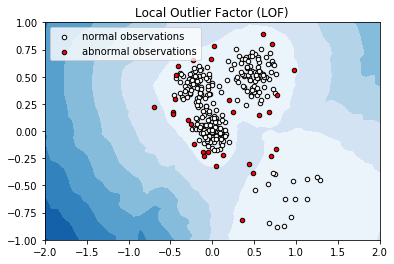

In [11]:
#         - from scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
#           'manhattan']

#         - from scipy.spatial.distance: ['braycurtis', 'canberra', 'chebyshev',
#           'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski',
#           'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
#           'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath',
#           'sqeuclidean', 'yule']

# metric='mahalanobis'
# Must provide either V or VI for Mahalanobis distance

# fit the model
# https://github.com/scikit-learn/scikit-learn/issues/6269
from sklearn.neighbors import DistanceMetric
clf = LocalOutlierFactor(n_neighbors=15
                         , 
                               metric='mahalanobis', 
                               metric_params={'V': np.cov(X[:,0], X[:,1], rowvar=False)}
                        ) #25
y_pred = clf.fit_predict(X)
y_pred
X[:,0][0]
normal_0 = [X[:,0][i] for i in range(0, len(X[:,0])) if y_pred[i] == 1]
normal_1 = [X[:,1][i] for i in range(0, len(X[:,0])) if y_pred[i] == 1]
abnormal_0 = [X[:,0][i] for i in range(0, len(X[:,0])) if y_pred[i] == -1]
abnormal_1 = [X[:,1][i] for i in range(0, len(X[:,0])) if y_pred[i] == -1]

# plot the level sets of the decision function
plt.close('all')
xx, yy = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-1, 1, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(normal_0, normal_1, c='white',
                edgecolor='k', s=20)
b = plt.scatter(abnormal_0, abnormal_1, c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-2, 2))
plt.ylim((-1, 1))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

In [83]:
y_pred

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [99]:
score = clf.negative_outlier_factor_
len(score)

300

In [113]:
arr1inds = score.argsort()
# sorted_arr1 = arr1[arr1inds[::-1]]
# sorted_arr2 = arr2[arr1inds[::-1]]
# EDIT: changed to descending order

score_sorted = score[arr1inds]
X_sorted = X[arr1inds]

In [127]:
fraction = int(len(X) * 0.05)
fraction

15

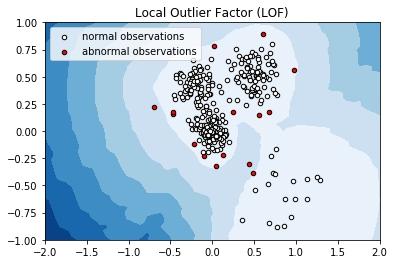

In [128]:
# plot the level sets of the decision function
plt.close('all')
xx, yy = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-1, 1, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X_sorted[0:fraction, 0], X_sorted[0:fraction, 1], c='red',
                edgecolor='k', s=20)
a = plt.scatter(X_sorted[fraction + 1:, 0], X_sorted[fraction + 1:, 1], c='white',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-2, 2))
plt.ylim((-1, 1))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

In [118]:
score_sorted[:fraction]

array([-2.65734141, -2.52205073, -2.17611673, -1.99090474, -1.97431256,
       -1.93622037, -1.92272281, -1.77100707, -1.75263637, -1.65847854,
       -1.63773297, -1.62990567, -1.61297636, -1.60208837, -1.58999202])

In [117]:
X_sorted[:fraction]

array([[ 0.43592182, -0.29880161],
       [-0.697698  ,  0.22558651],
       [ 0.48980895, -0.39015132],
       [ 0.04822661, -0.32573837],
       [ 0.24542645,  0.17804597],
       [ 0.02549212,  0.78631521],
       [ 0.98041922,  0.55825987],
       [-0.47235581,  0.15494887],
       [-0.4665307 ,  0.17486424],
       [-0.21488331, -0.12095684],
       [ 0.60858524,  0.89379515],
       [ 0.56009866,  0.14993332],
       [-0.10029329, -0.22705899],
       [ 0.12572342, -0.22067228],
       [ 0.67706046,  0.17960888]])

In [129]:
LocalOutlierFactor??